In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-real-estate-dataset/realtor-data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors
df = pd.read_csv('/kaggle/input/usa-real-estate-dataset/realtor-data.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Getting to know Data

In [3]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [5]:
df.isnull().sum()

status                0
bed               24950
bath              24888
acre_lot          14013
city                 52
state                 0
zip_code            195
house_size        24918
prev_sold_date    71255
price                 0
dtype: int64

In [6]:
df.dropna(inplace = True)

# Manipulating and plotting data

In [7]:
df['prev_sold_date'] = pd.to_datetime(df.prev_sold_date)
date_col = pd.DatetimeIndex(df['prev_sold_date'])
df['Years'] = date_col.year
df['Month'] = date_col.month

/tmp/ipykernel_20/321198307.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


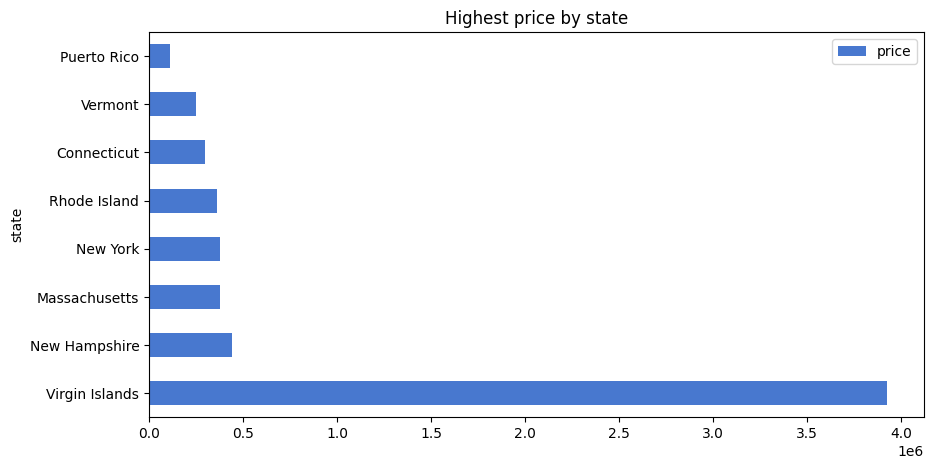

In [8]:
plt.style.use('seaborn-muted')
order = df.groupby('state').agg({'price':'median'}).sort_values(by='price',ascending = False).plot(kind = 'barh',
                             figsize=(10,5),title = 'Highest price by state')

<AxesSubplot: title={'center': 'Median size of the house'}, ylabel='city'>

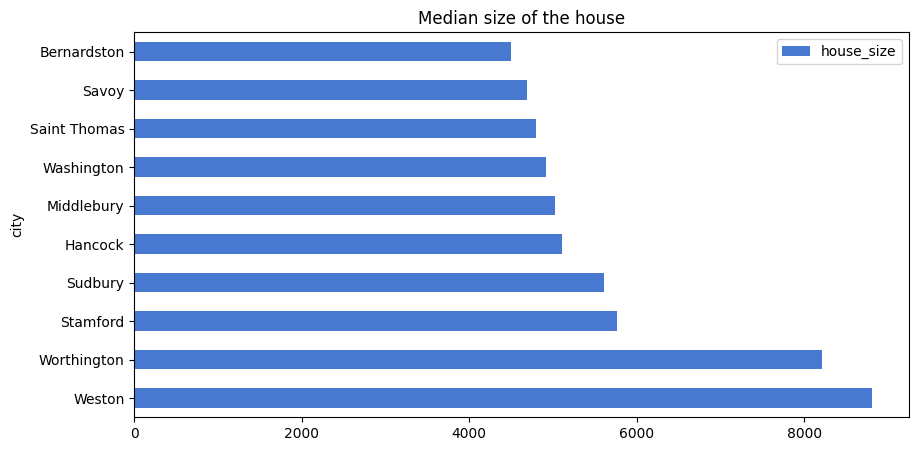

In [9]:
df.groupby('city').agg({'house_size':'median'}).sort_values(by='house_size',ascending = False).head(10).plot(kind = 'barh',
                                    figsize=(10,5),title = 'Median size of the house')


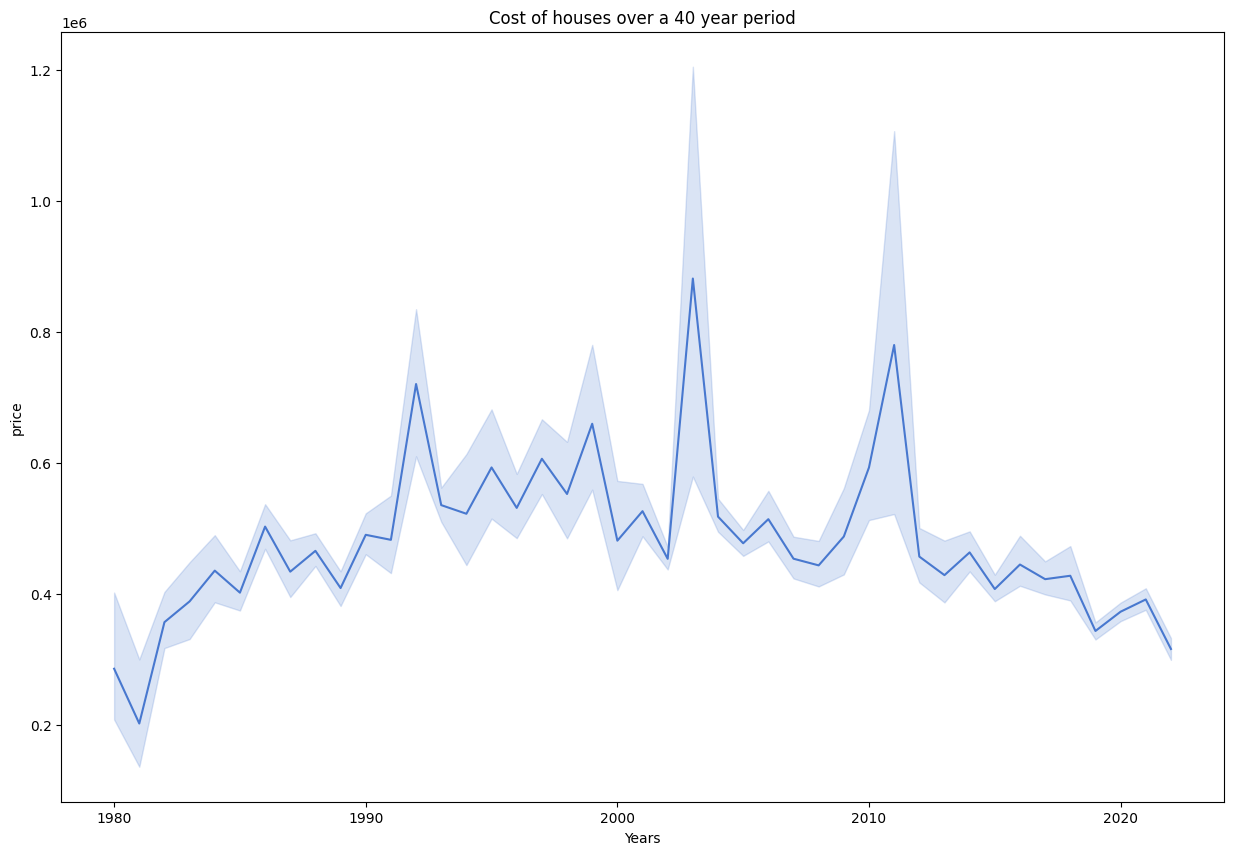

In [10]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Years',y='price',data = df[df['Years']>=1980]).set(title='Cost of houses over a 40 year period');

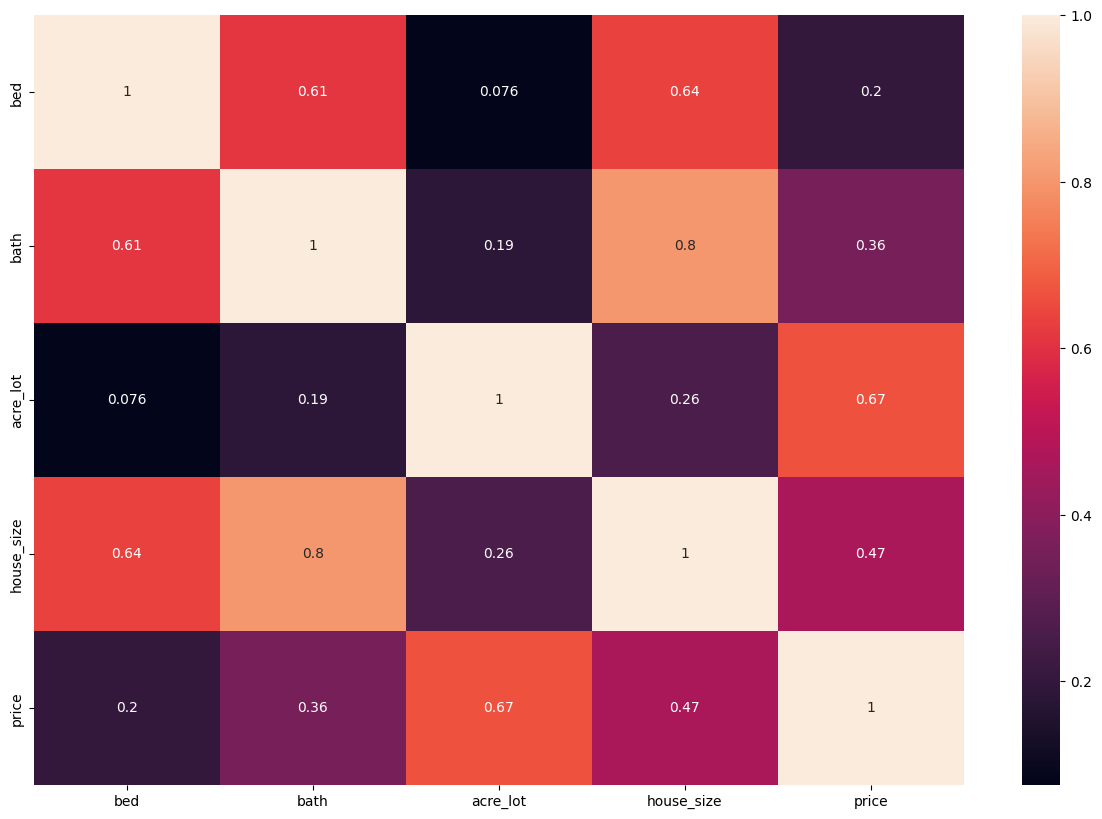

In [11]:
corr = df.loc[:,['bed','bath','acre_lot','house_size','price']]
plt.figure(figsize=(15,10))
sns.heatmap(data =  corr.corr(),annot = True);

# Preparing the data for regression models

In [12]:
ml = pd.get_dummies(df,columns = ['state'])
ml = ml.drop(columns = ['status','city','zip_code','prev_sold_date'])

In [13]:
X = ml.drop('price',axis = 1)
y = ml['price']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


# Random Forest

In [16]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred)

0.7042778430182247

# Standardizing data

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear regression

In [18]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred = linear_reg.predict(X_test_scaled)

linear_reg.score(X_test_scaled,y_test)

0.5437315932381284

# Ridge regression

In [19]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)

ridge_reg.score(X_test_scaled,y_test)

0.5438131936345106

# KNN

In [20]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train_scaled,y_train)
knn.predict(X_test_scaled)

knn_score =  knn.score(X_test_scaled,y_test)
knn_score

0.7478082479008721

# Plotting the model results

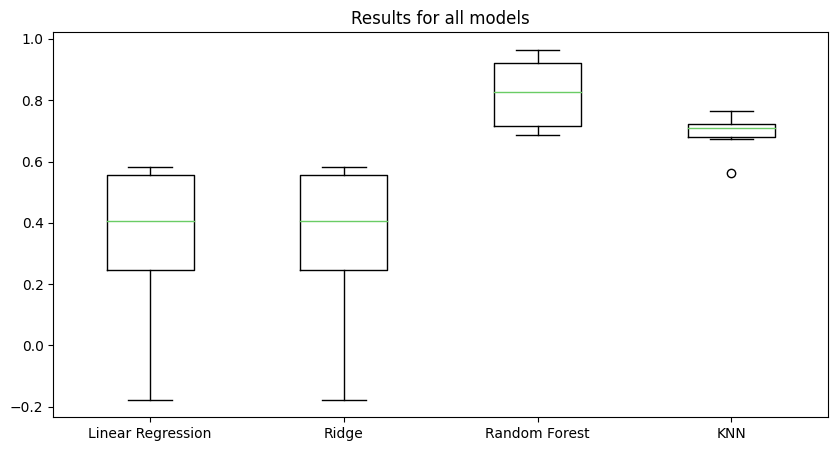

In [21]:
plt.figure(figsize=(10,5))
plt.title('Results for all models')
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),"Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()